In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
thinkbrake_data = """difficulty              total_count  incorrect_count  accuracy
1.000               126               26         79.37
1.500               209               52         75.12
2.000               166               41         75.30
2.250                 4                2         50.00
2.500               173               43         75.14
3.000                21                8         61.90
3.500               200               71         64.50
3.750                 3                2         33.33
4.000               543              242         55.43
4.250                 3                3          0.00
4.375                 1                0        100.00
4.500               398              197         50.50
4.750                12                4         66.67
5.000               890              492         44.72
5.250               232              152         34.48
5.500               158              101         36.08
6.000               259              185         28.57
6.250                 7                5         28.57
6.500               106               83         21.70
6.750                 1                1          0.00
7.000               387              318         17.83
7.500                77               59         23.38
8.000               265              222         16.23
8.250                 1                1          0.00
8.500                13               10         23.08
9.000               157              132         15.92
9.500                16               15          6.25"""

rollout_data = """difficulty              total_count  incorrect_count  accuracy
1.000               126               26         79.37
1.500               209               51         75.60
2.000               166               37         77.71
2.250                 4                2         50.00
2.500               173               43         75.14
3.000                21                9         57.14
3.500               200               74         63.00
3.750                 3                3          0.00
4.000               543              270         50.28
4.250                 3                3          0.00
4.375                 1                1          0.00
4.500               398              237         40.45
4.750                12                4         66.67
5.000               890              545         38.76
5.250               232              160         31.03
5.500               158              115         27.22
6.000               259              223         13.90
6.250                 7                5         28.57
6.500               106               98          7.55
6.750                 1                1          0.00
7.000               387              355          8.27
7.500                77               75          2.60
8.000               265              249          6.04
8.250                 1                1          0.00
8.500                13               12          7.69
9.000               157              144          8.28
9.500                16               16          0.00"""

token_data = {
    "Category": ["Correct Problems", "Incorrect Problems"],
    "Count": [1961, 2467],
    "Avg Token (Rollout)": [11977.643549, 17787.238752],
    "Avg Token (ThinkBrake)": [8919.184600, 11020.689501],
    "Avg Reduction Rate (%)": [20.181239, 35.986810],
}

df_tb = pd.read_csv(io.StringIO(thinkbrake_data), sep="\s+")
df_ro = pd.read_csv(io.StringIO(rollout_data), sep="\s+")
df_token = pd.DataFrame(token_data)

<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
/var/folders/kx/wqncr7cn4ss8bnrxq07f0pz40000gn/T/ipykernel_88328/2084053115.py:67: SyntaxWarning: invalid escape sequence '\s'
  df_tb = pd.read_csv(io.StringIO(thinkbrake_data), sep="\s+")
/var/folders/kx/wqncr7cn4ss8bnrxq07f0pz40000gn/T/ipykernel_88328/2084053115.py:68: SyntaxWarning: invalid escape sequence '\s'
  df_ro = pd.read_csv(io.StringIO(rollout_data), sep="\s+")


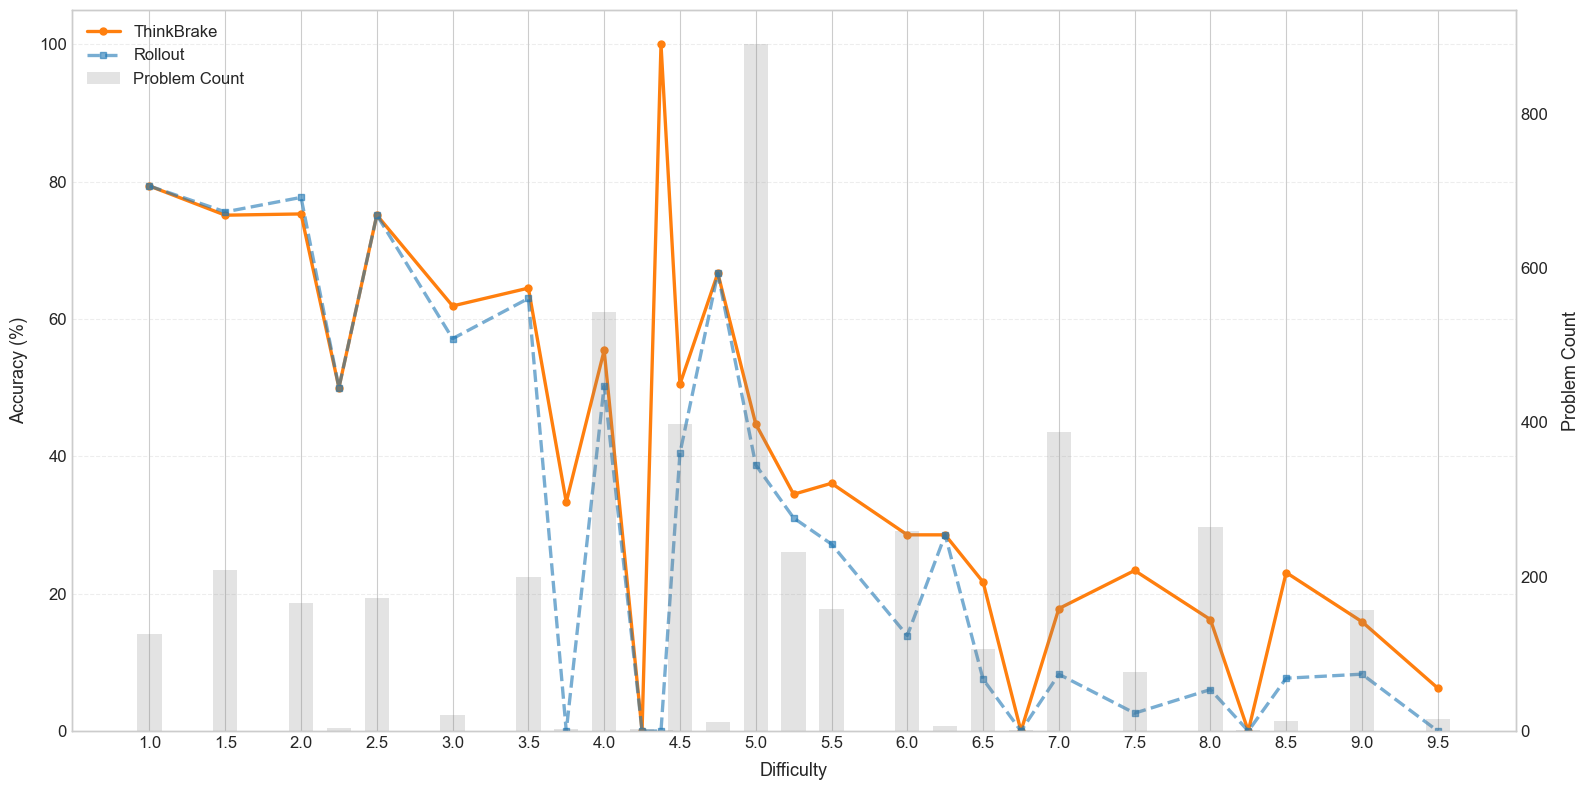

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# ================= Accuracy (foreground) =================
ax1.plot(
    df_tb["difficulty"],
    df_tb["accuracy"],
    marker="o",
    label="ThinkBrake",
    linewidth=2.4,
    markersize=5,
    color="#ff7f0e",
    zorder=3,
)

ax1.plot(
    df_ro["difficulty"],
    df_ro["accuracy"],
    marker="s",
    label="Rollout",
    linewidth=2.4,
    markersize=5,
    alpha=0.6,
    linestyle="--",
    color="#1f77b4",
    zorder=3,
)

ax1.set_ylabel("Accuracy (%)", fontsize=13, labelpad=8)
ax1.set_xlabel("Difficulty", fontsize=13, labelpad=8)
ax1.tick_params(axis="both", labelsize=12)
ax1.set_ylim(0, 105)
ax1.grid(True, axis="y", linestyle="--", alpha=0.35)

ax2 = ax1.twinx()
ax2.bar(
    df_tb["difficulty"],
    df_tb["total_count"],
    color="gray",
    alpha=0.22,
    width=0.16,
    label="Problem Count",
    zorder=1,
)

ax2.set_ylabel("Problem Count", fontsize=13, labelpad=10)
ax2.tick_params(axis="y", labelsize=12)
ax2.grid(False)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper left",
    fontsize=12,
    frameon=False,
)

ax1.set_xticks(np.arange(1, 10, 0.5))

plt.tight_layout()
plt.savefig("../assets/difficulty_experiment.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()